# Q2

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as met
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from math import sqrt

## 1. import dataset

In [2]:
# import from google colab

!pip install --no-cache-dir gdown
!gdown 1V1QyoKtRkK6Ln2OJjtnfvQ67II7-VG3T
df = pd.read_csv('/content/data_banknote_authentication.txt' ,header=None)
df

"\n!pip install --no-cache-dir gdown\n!gdown 1V1QyoKtRkK6Ln2OJjtnfvQ67II7-VG3T\ndf = pd.read_csv('/content/data_banknote_authentication.txt' ,header=None)\ndf\n"

In [3]:
# import from Jupiter notebook
'''
df = pd.read_csv('data_banknote_authentication.txt' ,header=None)
df
'''

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


## 2. Data Shuffling & train-test-split

In [4]:
df_shuffled = df.sample(frac=1, random_state=93)
df_shuffled.reset_index(inplace = True, drop = True)
df_shuffled

,0,1,2,3,4
0,-2.49410,3.544700,-1.37210,-2.84830,1
1,1.50990,0.039307,6.23320,-0.30346,0
2,-4.88610,7.054200,-0.17252,-6.95900,1
3,1.25720,4.873100,-5.28610,-5.87410,1
4,-1.97250,2.882500,-2.30860,-2.37240,1
...,...,...,...,...,...
1367,4.04460,11.174100,-4.35820,-4.74010,0
1368,-0.40857,3.097700,-2.96070,-2.68920,1
1369,2.56050,9.268300,-3.59130,-1.35600,0
1370,-0.59587,2.481100,-2.86730,-0.89828,1


In [5]:
X = df_shuffled.iloc[:, 0:4]
y = df_shuffled.iloc[:, 4:5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097, 1), (275, 1))

## 3. Gradient descent algorithm

In [6]:
# defining the functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def compute_gradient(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    gradient = np.dot(X.T, predictions - y) / m
    return gradient

def train(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros((n, 1))
    losses = []
    for epoch in range(epochs):
        gradient = compute_gradient(X, y, weights)
        weights -= learning_rate * gradient
        loss = np.mean(cross_entropy_loss(y, sigmoid(np.dot(X, weights))))
        losses.append(loss)
    return weights, losses

def evaluate(X, weights, threshold=0.5):
    predictions = sigmoid(np.dot(X, weights))
    labels = (predictions >= threshold).astype(int)
    return labels

In [7]:
# modeling

learning_rate = 0.01
epochs = 1000
trained_weights, losses = train(X_train, y_train, learning_rate, epochs)

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

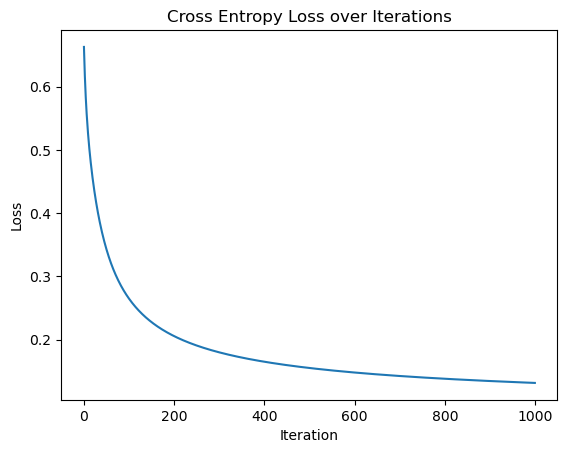

In [8]:
# plotting

plt.plot(losses)
plt.title('Cross Entropy Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [9]:
# model evaluation

test_predictions = evaluate(X_test, trained_weights)
accuracy = np.mean(test_predictions == y_test)
accuracy

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


4    0.949091
dtype: float64

In [10]:
test_predictions = evaluate(X_test, trained_weights)

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9490909090909091
Precision: 0.9908256880733946
Recall: 0.8925619834710744
F1 Score: 0.9391304347826087


## 4. Normalization

In [11]:
# Min-Max Scaling
'''scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)'''

'scaler = MinMaxScaler()\nnormalized_data = scaler.fit_transform(X)'

In [12]:
# Z-score normalization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

In [13]:
standardized_data

array([[-1.0303016 ,  0.27652505, -0.64285794, -0.78878495],
       [ 0.37870104, -0.3209606 ,  1.12234392,  0.42290092],
       [-1.87204343,  0.87471072, -0.36443357, -2.74603063],
       ...,
       [ 0.74840588,  1.25209864, -1.15793768, -0.07824958],
       [-0.36231681,  0.09523704, -0.98989616,  0.13968665],
       [-0.5572089 , -0.10686262,  1.46302257,  0.86557735]])

In [14]:
df2 = pd.DataFrame(standardized_data)
dfnew = pd.concat([df2, y], axis=1)
dfnew

,0,1,2,3,4
0,-1.030302,0.276525,-0.642858,-0.788785,1
1,0.378701,-0.320961,1.122344,0.422901,0
2,-1.872043,0.874711,-0.364434,-2.746031,1
3,0.289776,0.502948,-1.551303,-2.229472,1
4,-0.846751,0.163655,-0.860221,-0.562193,1
...,...,...,...,...,...
1367,1.270659,1.576938,-1.335936,-1.689536,0
1368,-0.296406,0.200335,-1.011574,-0.713032,1
1369,0.748406,1.252099,-1.157938,-0.078250,0
1370,-0.362317,0.095237,-0.989896,0.139687,1


## 5. repeat for normalized data

In [15]:
# data shuffling

df_shuffled2 = dfnew.sample(frac=1, random_state=93)
df_shuffled2.reset_index(inplace = True, drop = True)
df_shuffled2

,0,1,2,3,4
0,0.114446,-0.277931,-0.707498,0.966551,1
1,-0.188644,-0.017633,-0.838937,0.297301,1
2,1.227938,-0.881052,0.478193,0.965937,0
3,-1.103743,-0.049371,-0.130359,0.523873,1
4,-0.429540,1.302892,-1.203290,-3.005238,0
...,...,...,...,...,...
1367,1.667777,0.347414,-0.784649,0.761528,0
1368,-0.239941,-0.357995,0.814484,0.640851,0
1369,1.485880,0.974525,-0.887075,-0.022256,0
1370,1.754238,1.401649,-1.272294,-1.193880,0


In [16]:
# train test split

X = df_shuffled2.iloc[:, 0:4]
y = df_shuffled2.iloc[:, 4:5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097, 1), (275, 1))

In [17]:
# modeling

learning_rate = 0.01
epochs = 1000
trained_weights, losses1 = train(X_train, y_train, learning_rate, epochs)

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Zahra\anaconda3\lib\si

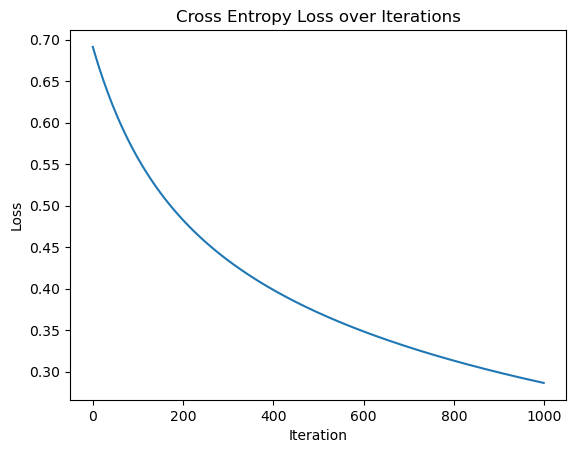

In [18]:
# plotting

plt.plot(losses1)
plt.title('Cross Entropy Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [19]:
# model evaluation

test_predictions = evaluate(X_test, trained_weights)
accuracy = np.mean(test_predictions == y_test)
accuracy

C:\Users\Zahra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


4    0.909091
dtype: float64

In [20]:
test_predictions = evaluate(X_test, trained_weights)

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9090909090909091
Precision: 0.8760330578512396
Recall: 0.9137931034482759
F1 Score: 0.8945147679324894


In [21]:
ehem = pd.DataFrame(test_predictions)
ehem.reset_index(inplace = True, drop = True)
test = pd.DataFrame(y_test)
test.reset_index(inplace = True, drop = True)
dfshow = pd.concat([test, ehem], axis=1)

In [22]:
dfshow.head()

,4,0
0,0,0
1,0,0
2,1,1
3,1,1
4,0,1


## 6. Data balance

In [23]:
dfnew

,0,1,2,3,4
0,-1.030302,0.276525,-0.642858,-0.788785,1
1,0.378701,-0.320961,1.122344,0.422901,0
2,-1.872043,0.874711,-0.364434,-2.746031,1
3,0.289776,0.502948,-1.551303,-2.229472,1
4,-0.846751,0.163655,-0.860221,-0.562193,1
...,...,...,...,...,...
1367,1.270659,1.576938,-1.335936,-1.689536,0
1368,-0.296406,0.200335,-1.011574,-0.713032,1
1369,0.748406,1.252099,-1.157938,-0.078250,0
1370,-0.362317,0.095237,-0.989896,0.139687,1


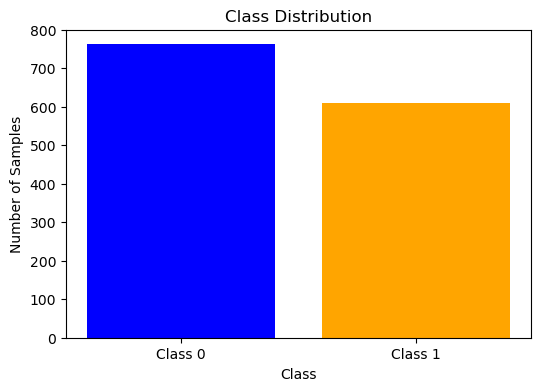

Class 0 samples: 762
Class 1 samples: 610


In [24]:
# unbalanced data

class_counts = dfnew.iloc[:, 4:5].value_counts()

class_counts_index = [0, 1]

plt.figure(figsize=(6, 4))
plt.bar(class_counts_index, class_counts.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(class_counts_index, labels=['Class 0', 'Class 1'])
plt.show()


print('Class 0 samples:', class_counts[0])
print('Class 1 samples:', class_counts[1])

In [25]:
smote = SMOTE(sampling_strategy='auto')
X = dfnew.iloc[:, 0:4]
y = dfnew.iloc[:, 4:5]
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

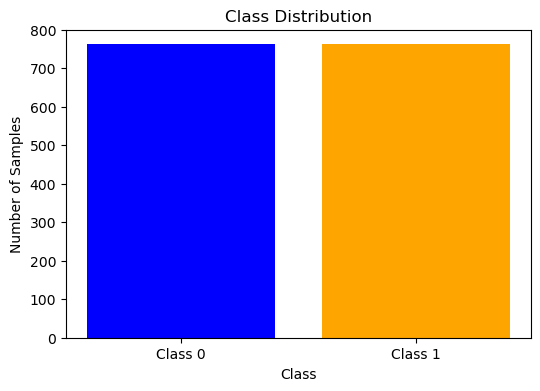

Class 0 samples: 762
Class 1 samples: 762


In [26]:
# balanced data

class_counts = df_resampled.iloc[:, 4:5].value_counts()

class_counts_index = [0, 1]

plt.figure(figsize=(6, 4))
plt.bar(class_counts_index, class_counts.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(class_counts_index, labels=['Class 0', 'Class 1'])
plt.show()


print('Class 0 samples:', class_counts[0])
print('Class 1 samples:', class_counts[1])

## 7.  Logistic Regression

In [27]:
df_shuffled = df.sample(frac=1, random_state=93)
df_shuffled.reset_index(inplace = True, drop = True)
df_shuffled

,0,1,2,3,4
0,-2.49410,3.544700,-1.37210,-2.84830,1
1,1.50990,0.039307,6.23320,-0.30346,0
2,-4.88610,7.054200,-0.17252,-6.95900,1
3,1.25720,4.873100,-5.28610,-5.87410,1
4,-1.97250,2.882500,-2.30860,-2.37240,1
...,...,...,...,...,...
1367,4.04460,11.174100,-4.35820,-4.74010,0
1368,-0.40857,3.097700,-2.96070,-2.68920,1
1369,2.56050,9.268300,-3.59130,-1.35600,0
1370,-0.59587,2.481100,-2.86730,-0.89828,1


In [28]:
X = df_shuffled.iloc[:, 0:4]
y = df_shuffled.iloc[:, 4:5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097, 1), (275, 1))

In [29]:
# modeling

model1 = LogisticRegression(solver='lbfgs', max_iter=2000, multi_class='ovr', penalty='l2', random_state=93)
model1.fit(X_train, y_train);

C:\Users\Zahra\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# prediction

ypred1 = model1.predict(X_test)
ypred1_2 = model1.predict_proba(X_test)
ypred1_3 = model1.predict_log_proba(X_test)
ypred1, y_test

(array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64),
       4
 1189  1
 380   1
 852   0
 1346  1
 1195  0
 .

In [31]:
# score
# accuracy

a = model1.score(X_train, y_train)
b = model1.score(X_test, y_test)
[a, b]

[0.99179580674567, 0.9890909090909091]

In [32]:
# error
a = met.mean_squared_error(y_test, ypred1)     # MSE
b = mean_absolute_error(y_test, ypred1)        # MAE
c = sqrt(mean_squared_error(y_test, ypred1))   # SMSE
[a, b, c]

[0.01090909090909091, 0.01090909090909091, 0.1044465935734187]

In [33]:
# confusion matrix
confusion_matrix(y_test, ypred1)

array([[151,   3],
       [  0, 121]], dtype=int64)

In [34]:
test_predictions = evaluate(X_test, trained_weights)

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8945454545454545
Precision: 0.9509803921568627
Recall: 0.8016528925619835
F1 Score: 0.8699551569506727


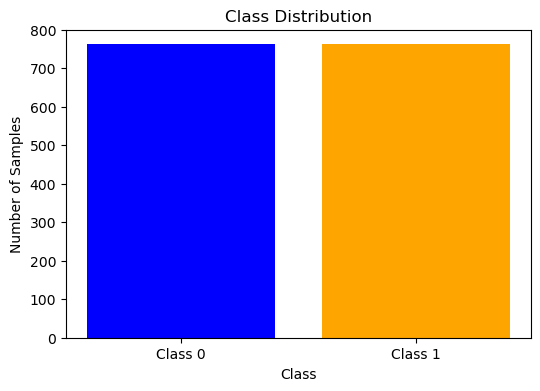

Class 0 samples: 762
Class 1 samples: 762


In [35]:
smote = SMOTE(sampling_strategy='auto')
X = dfnew.iloc[:, 0:4]
y = dfnew.iloc[:, 4:5]
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
# balanced data

class_counts = df_resampled.iloc[:, 4:5].value_counts()

class_counts_index = [0, 1]

plt.figure(figsize=(6, 4))
plt.bar(class_counts_index, class_counts.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(class_counts_index, labels=['Class 0', 'Class 1'])
plt.show()


print('Class 0 samples:', class_counts[0])
print('Class 1 samples:', class_counts[1])